<a href="https://colab.research.google.com/github/rlevy820/ds2002/blob/main/sqliteHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pandas as pd

In [2]:
connection = sqlite3.connect('student_grades.db')
cursor = connection.cursor()

In [3]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
  student_id INTEGER PRIMARY KEY AUTOINCREMENT,
  first_name TEXT,
  last_name TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
  grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
  student_id INTEGER,
  subject TEXT,
  grade INTEGER
)
''')

In [4]:
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eva', 'Davis')
]

cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

connection.commit()

In [5]:
grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 81),
    (3, 'English', 70),
    (3, 'History', 83),
    (4, 'Math', 92),
    (4, 'English', 86),
    (4, 'History', 88),
    (5, 'Math', 90),
    (5, 'English', 66),
    (5, 'History', 89)
]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

connection.commit()

In [6]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')
print(cursor.fetchall())

[('Alice', 'Johnson', 'Math', 95), ('Alice', 'Johnson', 'English', 88), ('Alice', 'Johnson', 'History', 90), ('Bob', 'Smith', 'Math', 82), ('Bob', 'Smith', 'English', 76), ('Bob', 'Smith', 'History', 85), ('Carol', 'White', 'Math', 81), ('Carol', 'White', 'English', 70), ('Carol', 'White', 'History', 83), ('David', 'Brown', 'Math', 92), ('David', 'Brown', 'English', 86), ('David', 'Brown', 'History', 88), ('Eva', 'Davis', 'Math', 90), ('Eva', 'Davis', 'English', 66), ('Eva', 'Davis', 'History', 89)]


In [7]:
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade)
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')
print(cursor.fetchall())

[('Alice', 'Johnson', 91.0), ('Bob', 'Smith', 81.0), ('Carol', 'White', 78.0), ('David', 'Brown', 88.66666666666667), ('Eva', 'Davis', 81.66666666666667)]


In [8]:
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade)
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY grades.grade DESC
LIMIT 1
''')
print(cursor.fetchall())

[('Alice', 'Johnson', 91.0)]


In [9]:
cursor.execute('''
SELECT AVG(grade) FROM grades
WHERE subject = 'Math'
''')
print(cursor.fetchall()[0][0])

88.0


In [10]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
''')
print(cursor.fetchall())

[('Alice', 'Johnson', 95), ('David', 'Brown', 92)]


In [11]:
students_df = pd.read_sql_query('SELECT * FROM students', connection)
students_df.head()

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eva,Davis


In [12]:
grades_df = pd.read_sql_query('SELECT * FROM grades', connection)
grades_df.head()

,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76


In [13]:
joined_df = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''', connection)
joined_df.head()

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,76


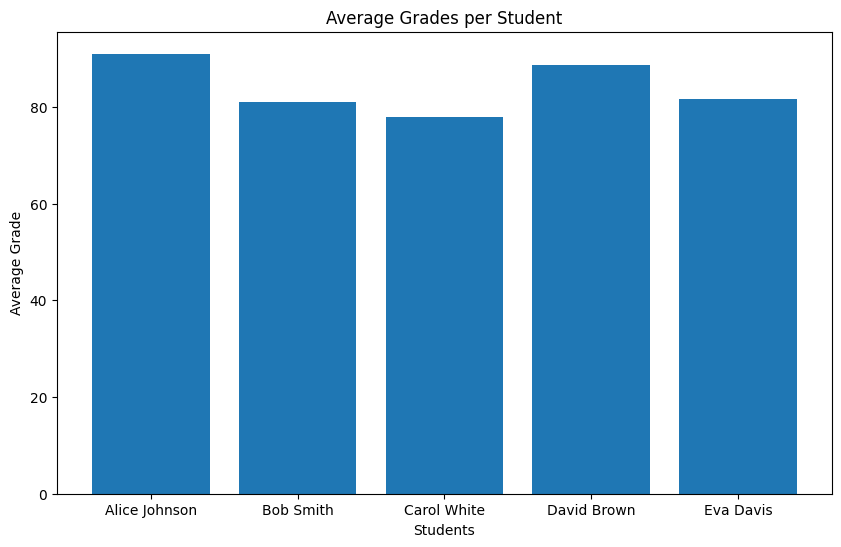

In [19]:
import matplotlib.pyplot as plt

cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade)
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')
avg_grades = cursor.fetchall()

names = [f"{row[0]} {row[1]}" for row in avg_grades]
grades = [row[2] for row in avg_grades]

plt.figure(figsize=(10, 6))
plt.bar(names, grades)
plt.xlabel("Students")
plt.ylabel("Average Grade")
plt.title("Average Grades per Student")
plt.show()

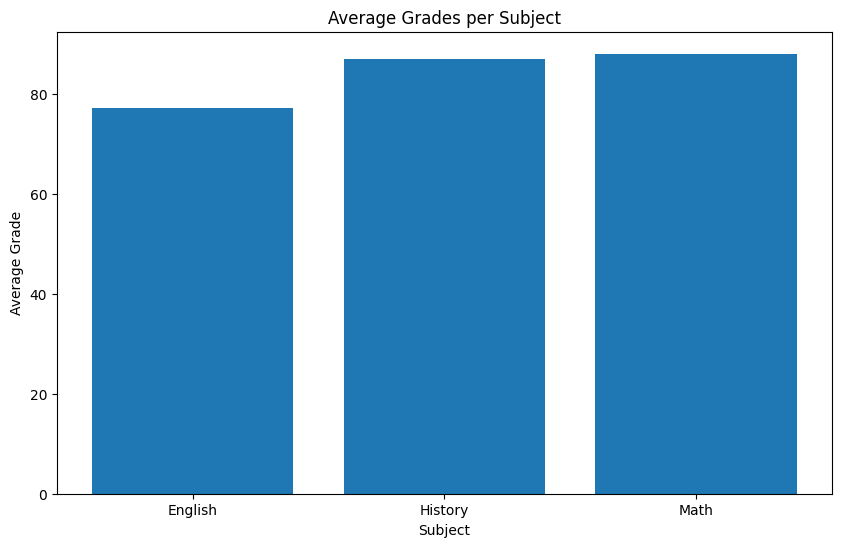

In [15]:
cursor.execute('''
SELECT subject, AVG(grade)
FROM grades
GROUP BY subject
''')
avg_grades_subject = cursor.fetchall()

subjects = [row[0] for row in avg_grades_subject]
avg_grades = [row[1] for row in avg_grades_subject]

plt.figure(figsize=(10, 6))
plt.bar(subjects, avg_grades)
plt.xlabel("Subject")
plt.ylabel("Average Grade")
plt.title("Average Grades per Subject")
plt.show()

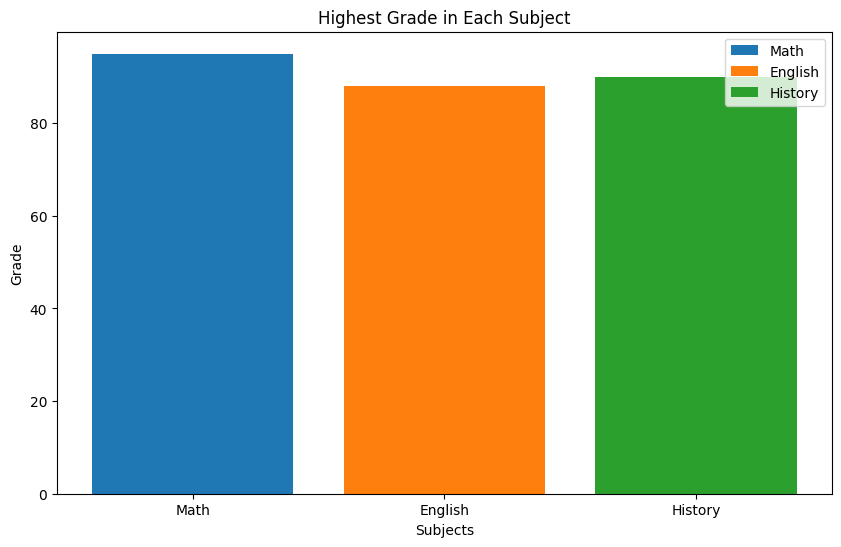

In [16]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE (grades.subject, grades.grade) IN (
        SELECT subject, MAX(grade)
        FROM grades
        GROUP BY subject
    )
''')

highest_grades = cursor.fetchall()

names = [f"{row[0]} {row[1]}" for row in highest_grades]
subjects = [row[2] for row in highest_grades]
grades = [row[3] for row in highest_grades]

plt.figure(figsize=(10, 6))

for i, subject in enumerate(subjects):
    plt.bar(i, grades[i], label=subject)

plt.xlabel("Subjects")
plt.ylabel("Grade")
plt.title("Highest Grade in Each Subject")
plt.xticks(range(len(subjects)), subjects)
plt.legend()

plt.show()